In [53]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [54]:
train = pd.read_csv('../../материалы/Final Kaggle/train.csv')
test_df = pd.read_csv('../../материалы/Final Kaggle/test.csv')

In [55]:
train['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [56]:
train.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns 

(None, None)

In [57]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8009,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9748,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.4400,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.7243,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3706,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1215,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1172,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0591,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0277,0.164120,0.0,0.00,0.0,0.00,1.0


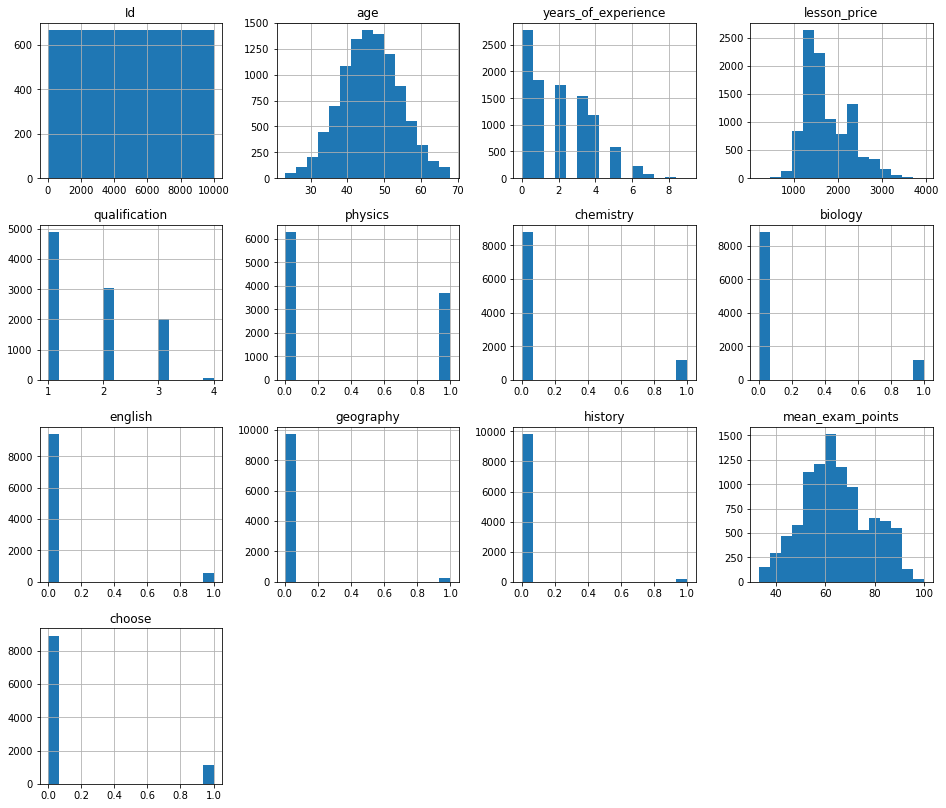

In [58]:
train.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

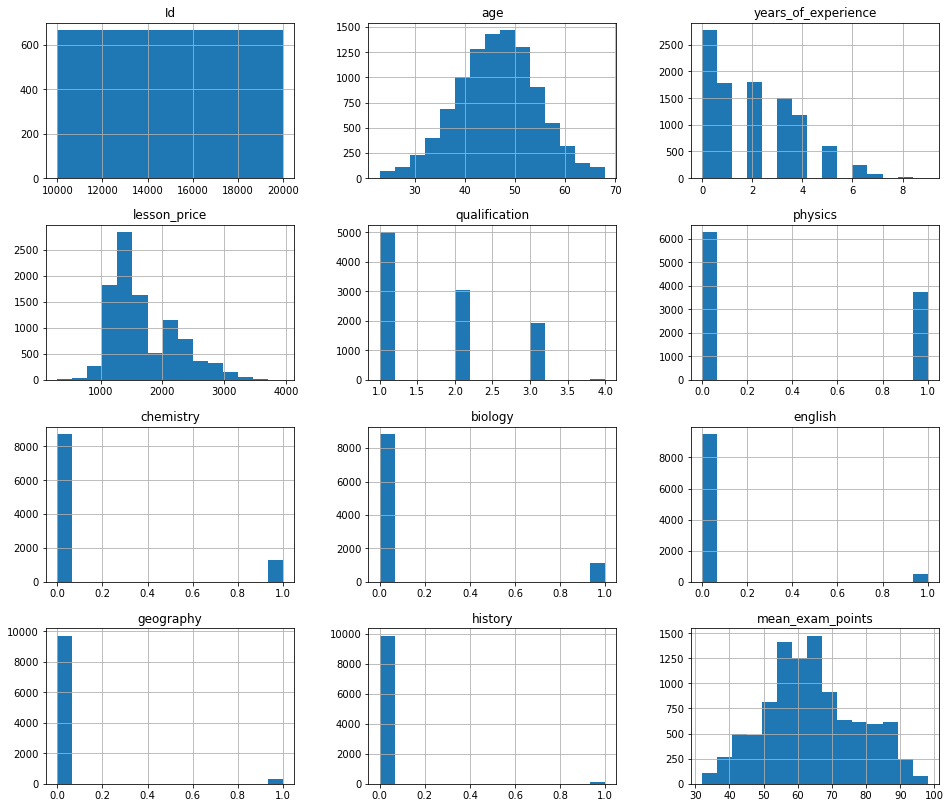

In [59]:
test_df.hist(figsize =(16,14),bins = 15, grid = True)
plt.show()

In [60]:
pd.cut(train['age'],[0,40,46,51,100],labels=[1,2,3,4]).astype('float')

0       1.0
1       4.0
2       1.0
3       1.0
4       2.0
       ... 
9995    4.0
9996    4.0
9997    2.0
9998    2.0
9999    2.0
Name: age, Length: 10000, dtype: float64

In [61]:
np.quantile(train['lesson_price'], .75)

2150.0

In [62]:
target = 'choose'
y = train[target]
X = train.drop(columns=['Id', 'choose'])
test_X = test_df.drop(columns='Id')

In [63]:
def Standard(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data[i][j] = (data[i][j] - means[j])/stds[j]
    return data

In [64]:
X = X.values
y = y.values
test_X = test_X.values

In [65]:
Standard(X)
Standard(test_X)

array([[-1.73371969,  0.00807395,  1.90046712, ..., -0.17343093,
        -0.12382046,  1.90506341],
       [-1.36019396,  2.26652127,  0.19020064, ..., -0.17343093,
        -0.12382046,  0.50485588],
       [-0.23961676,  0.00807395, -0.94997702, ..., -0.17343093,
        -0.12382046, -1.41121759],
       ...,
       [-0.23961676,  0.00807395, -0.85496222, ..., -0.17343093,
        -0.12382046, -0.08470519],
       [ 0.63194329,  1.70190944, -1.33003624, ..., -0.17343093,
        -0.12382046, -0.01101005],
       [-0.36412533, -1.12114971, -0.37988819, ..., -0.17343093,
        -0.12382046, -1.70599812]])

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [67]:
#LogisticRegression?

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [69]:
#LogisticRegression(
 #   penalty='l2',
  #  *,
   # dual=False,
   # tol=0.0001,
   # C=1.0,
   # fit_intercept=True,
    #intercept_scaling=1,
   # class_weight=None,
   # random_state=None,
    #solver='lbfgs',
   # max_iter=100,
   # multi_class='auto',
   # verbose=0,
    #warm_start=False,
    #n_jobs=None,
    #l1_ratio=None,
#)

In [70]:
logreg = LogisticRegression(max_iter=10000, random_state=0)

In [71]:

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [72]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2621   32]
 [ 280   67]]


In [74]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2653
           1       0.68      0.19      0.30       347

    accuracy                           0.90      3000
   macro avg       0.79      0.59      0.62      3000
weighted avg       0.88      0.90      0.87      3000



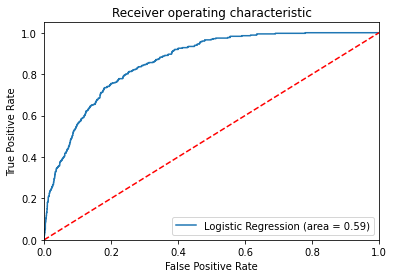

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [76]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [77]:
logreg.fit(X,y)

LogisticRegression(max_iter=10000, random_state=0)

In [78]:
y_pred = logreg.predict_proba(test_X)

In [79]:
df = pd.DataFrame(y_pred, columns = ['actual','choose'])
df['choose']

0       0.015029
1       0.197244
2       0.014314
3       0.012636
4       0.198351
          ...   
9995    0.137623
9996    0.013712
9997    0.343694
9998    0.895968
9999    0.022110
Name: choose, Length: 10000, dtype: float64

In [80]:
submis = pd.concat([test_df['Id'], df['choose']], axis = 1)

In [81]:
submis

,Id,choose
0,10000,0.015029
1,10001,0.197244
2,10002,0.014314
3,10003,0.012636
4,10004,0.198351
...,...,...
9995,19995,0.137623
9996,19996,0.013712
9997,19997,0.343694
9998,19998,0.895968


In [84]:
submis.to_csv('../../../../../Desktop/predict.csv', index=None)